cg_coef, cg_table, complex_multiplication, tensor_coupling, WignerDなどのtest. イケてる.

In [3]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import theano
import theano.tensor as T 

import TN_utils
reload(TN_utils)

import blocks

In [4]:
def tensor_coupling(x1, x2, j, j1, j2):
    """
        x: (N, dim, n_tensors)
    """    
    def c_mul(y1, y2):
        """x: (N, 2, n_tensors)"""
        return T.stacklists([y1[:, 0]*y2[:, 0] - y1[:, 1]*y2[:, 1], 
                                         y1[:, 0]*y2[:, 1] + y1[:, 1]*y2[:, 0]]).transpose(1, 0, 2)
    cg_table = TN_utils.cg_table(j, j1, j2)
    tensor = []
    for m in range(-j, j+1):
        tmp = 0
        for m1, m2 in [(m1, m2) for m1 in range(-j1, j1+1) for m2 in range(-j2, j2+1) if m == m1+m2]:
            tmp += cg_table[m, m1, m2]*c_mul(x1[:, 2*(m1+j1) : 2*(m1+j1)+2], x2[:, 2*(m2+j2) : 2*(m2+j2)+2])
        tensor.append(tmp)
    out = T.concatenate(tensor, axis=1)
    return out

In [ ]:
x1 = T.tensor3()
x2 = T.tensor3()
out = tensor_coupling(x1, x2, j=4, j1=2, j2=4)
f_4_24 = theano.function(inputs=[x1, x2],
                    outputs=[out])

INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '11616')
INFO:theano.gof.compilelock:Waiting for existing lock by unknown process (I am process '11616')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/matsui-k/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir
INFO:theano.gof.compilelock:To manually release the lock, delete /home/matsui-k/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '67384' (I am process '11616')
INFO:theano.gof.compilelock:Waiting for existing lock by process '67384' (I am process '11616')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/matsui-k/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir
INFO:theano.gof.compilelock:To manually release the lock, delete /home/matsui-k

In [264]:
d2 = data_set[0][:2, :, :3]
print d2
print d2.shape

e4 = data_set4[0][2:4, :, :3]
print e4
print e4.shape
f4 = f_4_24(d2, e4)[0]
print f4
print f4.shape

[[[  8.56593922e-02  -1.49386920e-04  -3.28824460e-03]
  [  6.16603680e-02   2.40671900e-04  -2.03959923e-02]
  [ -1.89289138e-01   2.79454794e-03  -1.27256662e-02]
  [ -7.31389374e-02   5.02372440e-03  -1.19942417e-02]
  [ -1.04597576e-01   4.73971963e-02   4.80040610e-02]
  [ -1.66741046e-07   3.94356725e-08  -1.42993430e-08]
  [  1.89289019e-01  -2.79444316e-03   1.27256392e-02]
  [ -7.31391087e-02   5.02354652e-03  -1.19943004e-02]
  [  8.56597051e-02  -1.49376967e-04  -3.28833167e-03]
  [ -6.16600253e-02  -2.40654103e-04   2.03958862e-02]]

 [[ -4.38101180e-02   1.30733021e-03  -4.59400862e-02]
  [ -5.00477888e-02   2.82440335e-04   5.97897060e-02]
  [  2.11181298e-01   1.60171948e-02   1.49952054e-01]
  [  2.52319366e-01   1.71046180e-03   9.70959067e-02]
  [ -6.19091809e-01   7.81089664e-02  -1.53909266e-01]
  [  3.34826609e-07  -1.26961353e-07   1.77356199e-07]
  [ -2.11181074e-01  -1.60172246e-02  -1.49951905e-01]
  [  2.52319783e-01   1.71052653e-03   9.70961079e-02]
  [ -4.3

(array([  3.,   4.,  14.,  76.,   5.,   1.,   2.,   1.,   1.,   1.]), array([ -8.16918316e-09,  -5.56840868e-09,  -2.96763419e-09,
        -3.66859701e-10,   2.23391479e-09,   4.83468927e-09,
         7.43546376e-09,   1.00362382e-08,   1.26370127e-08,
         1.52377872e-08,   1.78385617e-08]), <a list of 10 Patch objects>)


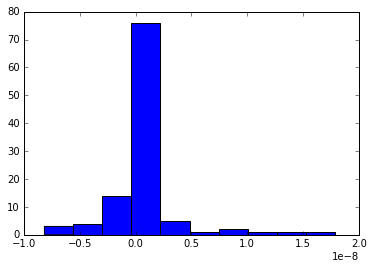

In [265]:
D4 = wignerD(4)
# f4も一緒にD4で回転してる。OK!
d2_r = rotate_tensor(d2, D2)
e4_r = rotate_tensor(e4, D4)

f4_r = f_4_24(d2_r, e4_r)[0]

# 誤差ほとんど0
print plt.hist((f4 - rotate_tensor(f4_r, D4)).flatten())

In [266]:
tensor_coupling

<function blocks.tensor_coupling>